## ● 文字資料的處理  MingHsun 2016/01/30

* 1.Python內建<br>
*  2.RE <br>
*  3.NLTK

## 1.Python 內建的文字處理功能

In [2]:
a='This is a built-in module'
print(a.lower(),a.upper())#大小寫
print(a.split(' '),a.split('-'))#文字的切割
print(a.find('built'),a[10:15])
print(a.replace('module','library'))
print(a.count('is'))
print(a.center(50,'='))

this is a built-in module THIS IS A BUILT-IN MODULE
['This', 'is', 'a', 'built-in', 'module'] ['This is a built', 'in module']
10 built
This is a built-in library
2
============This is a built-in module=============


## RE((Regular Expression))
* RE 好用之處在於搜尋的是文字的pattern而非一特定字

*正規表示式(Regular Expression)主要功能<br>
>搜尋：<br>
re.compile()<br>
re.search()掃瞄字符串，找到這個 RE 匹配的位置<br>
re.match()決定 RE 是否在字符串剛開始的位置匹配<br>
re.findall()找到 RE 匹配的所有子串，並把它們作為一個列表返回<br>
re.finditer()找到 RE 匹配的所有子串，並把它們做迴圈式返回<br>
re.split()在 RE 匹配的地方將字符串分片，將做一個列表返回<br>

>\d  匹配任何十進制數；它相當於類 [0-9]<br>
\D  匹配任何非數字字符；它相當於類 [^0-9]<br>
\s  匹配任何空白字符；它相當於類  [ "t"n"r"f"v] <br>
\S  匹配任何非空白字符；它相當於類 [^ "t"n"r"f"v] <br>
\w  匹配任何字母數字字符；它相當於類 [a-zA-Z0-9_]<br>
\W  匹配任何非字母數字字符；它相當於類 [^a-zA-Z0-9_]<br>

### 臺灣身份證號碼簡單檢查：

In [2]:
#臺灣身份證號碼簡單檢查：
import re
print(bool(re.match('[A-Za-z]\d{9}','a888888888')))

True


### 電子郵件地址的簡單檢查：

In [3]:
#電子郵件地址的簡單檢查：
import re
print(bool(re.match('[^@]+@[^@]+\.[^@]+','a11111@email.com')))#[^@]符合所有文字但是排除@

True


### re.find / search/ findall 範例

In [4]:
import re
regex=re.compile('abc',re.IGNORECASE)#忽略大小寫
for txt in ['abc','hello abc','hi AbC aBc']:
    print('-'*50)
    out=regex.search(txt)
    if(out): print('search() found:',out.string)
    out=regex.match(txt)
    if(out): print('match() found:',out.string)
    out=regex.findall(txt)
    if(out): print('findall() found:',out)

--------------------------------------------------
search() found: abc
match() found: abc
findall() found: ['abc']
--------------------------------------------------
search() found: hello abc
findall() found: ['abc']
--------------------------------------------------
search() found: hi AbC aBc
findall() found: ['AbC', 'aBc']


### 取代：
> re.sub()<br>

* 在文字處理中常見的用途就是找到所有模式匹配的字符串並用不同的字符串來替換它們。sub() 方法提供一個替換值，可以是字符串或一個函數，和一個要被處理的字符串

### re.sub 範例

In [6]:
#sub
import re
html='<body><b>test</b><img src=test.jpg></body>'
print(re.sub('<[^<]*>','',html))


e='@mail.ntu.edu.tw'
t='pichun_huang,chendy'
print(re.sub('\w+','\g<0>'+e,t))

test
pichun_huang@mail.ntu.edu.tw,chendy@mail.ntu.edu.tw


### 應用:搜尋retweets(回推)

In [7]:
import re
rt=re.compile('(RT|via)(.*@\w+)')
tweets=['RT @spiketren No class tomorrow','No class tomorrow (via @spiketren)']
for t in tweets:
    out=rt.findall(t)
    print(out,len(out),out[0])

[('RT', ' @spiketren')] 1 ('RT', ' @spiketren')
[('via', ' @spiketren')] 1 ('via', ' @spiketren')


# NLTK Natural Language Toolkit 自然語言處理

In [6]:
import nltk
# nltk.download()

## 重要概念
>標記化（tokenization）：文本轉換為標記的過程 也就是斷詞<br>
標記（token）：文本中出現的詞彙或實體<br>
文本對象（text object）：句子/短語/詞彙/文章<br>

In [7]:
from nltk.book import text4
print(len(set(text4))/len(text4)) # lexical diversity
long_words=[w for w in set(text4) if len(w)>15]
print(len(long_words)) # number of big words

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
0.06692970116993173
18


In [8]:
import nltk
mytxt='This is a cat. That is a dog.'
print(nltk.sent_tokenize(mytxt))#Tokenize sentences （分詞）
text=nltk.Text(nltk.word_tokenize(mytxt))
print (text)

['This is a cat.', 'That is a dog.']
<Text: This is a cat . That is a...>


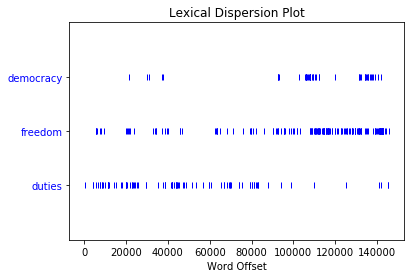

174
['Fellow', '-', 'Citizens', 'of', 'the', 'Senate', 'and', 'House', 'Representatives', ':', 'Among', 'vicissitudes', 'incident', 'to', 'life', 'no', 'event', 'could', 'have', 'filled', 'me', 'with', 'greater', 'anxieties', 'than', 'that', 'which', 'notification', 'was', 'transmitted', 'by', 'your', 'order', ',', 'received', 'on', '14th', 'day', 'present', 'month', '.', 'On', 'one', 'hand', 'I', 'summoned', 'my', 'Country', 'whose', 'voice']


In [9]:
from nltk.book import text4
text4.dispersion_plot(['democracy','freedom','duties'])
#text4.generate() # random text; not working in NLTK3
dist=nltk.FreqDist(text4)
print(dist['freedom'])
vocabulary=dist.keys(); print(list(vocabulary)[:50])

## 文本分析 (Text Mining)

## 步驟
>Step1:<br>
文本斷句:將文章轉為句子<br>
Step2:<br>
斷詞 (Tokenize) : 就是我們所說的斷詞，在處理一篇文章以前，當然是要先把每個word斷好<br>
Step3:<br>
詞性標記 (POS):標記一個句子中的詞性<br>
Step4:<br>
分塊 (chunk)，亦即標記句子中的關係<br>
Step5:<br>
解剖樹 (Parser tree)，由許多chunk所組成<br>

In [13]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.chunk import ne_chunk
from nltk.tag import pos_tag
from nltk.tree import Tree

SampleTXT='Hellow, my name is Steven'

sentence= pos_tag(word_tokenize(SampleTXT))#斷詞(Tokenize)&詞性標記(POS)

print (sentence)


grammar = "NP: {<DT>?<JJ>*<NN>}"#optional determiner (DT) followed by any number of adjectives (JJ) and then a noun (NN)

cp = nltk.RegexpParser(grammar)

result = cp.parse(sentence)

print (result)

result.draw()

[('Hellow', 'NNP'), (',', ','), ('my', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('Steven', 'NNP')]
(S Hellow/NNP ,/, my/PRP$ (NP name/NN) is/VBZ Steven/NNP)


## 中文斷詞模組結巴 (jieba)
* 重要功能
>jieba.cut("字串", cut_all=False)  #  預設切分<br>
jieba.cut("字串", cut_all=True)  #  全切分<br>
jieba.cut_for_search("字串")  #  搜尋引擎切分

In [22]:
import jieba
from collections import Counter

string="還記得 34 年前我坐在下面的椅子上，跟各位一樣坐在大學畢業典禮台下的椅子上"
a=jieba.cut("string", cut_all=False)
countW=Counter(jieba.cut(string, cut_all=False))
print (countW)

Counter({' ': 2, '坐在': 2, '的': 2, '椅子': 2, '上': 2, '還記': 1, '得': 1, '34': 1, '年前': 1, '我': 1, '下面': 1, '，': 1, '跟': 1, '各位': 1, '一樣': 1, '大學': 1, '畢業': 1, '典禮': 1, '台下': 1})


## 實做:中文結巴斷詞與文字雲視覺化-2017李開復台大畢業演講

In [3]:
raw_speech="還記得 34 年前，我跟各位一樣坐在大學畢業典禮台下。當年的我，大學四年，找到了我的兩個最愛。第一個最愛是我的初戀，也是我的畢生摯愛，我的妻子。而今天，不是來講我的初戀，而是來講我另外一個大學期間的最愛：人工智慧，就是現在最火的 AI。我最近找到我大學畢業時，申請博士作文。我把它 po 上了我的 fb：「 AI 是對人類學習過程的闡釋，對人類思維過程的量化，對人類行為的澄清，以及對人類智力的理解。AI 是人類認識並理解自己的最後一步，我希望加入到這個一個全新但是最能改變世界的科學。」畢業那天之後的 34 年，我在 AI 科研、開發、投資方面不斷耕耘。今天，我很有把握地告訴大家：未來 10 年的 AI 革命比工業革命規模更大，而且來得更迅速猛烈。有什麼證據呢？ 最近最大的科技新聞就是 AlphaGo 打敗人類最頂尖的棋手柯潔。棋聖聶衛平點評：AlphaGo 可以說是 20 段，人類要打贏 AlphaGo 唯一的希望就是拔掉電源。AlphaGo 只是一個例子，在過去的兩年，AI 在人臉辨認、語音辨認都超越了人類。 我們投資的一家 AI 貸款公司，每筆貸款只要 8 秒鐘，2比人花 8 個小時還要精確。這家公司今年將會發放 3000 萬筆貸款，幾乎超越了所有的銀行。如果把這些技術和成果往後延伸，我們可以很確定地預測：未來十年，AI 能在任何任務導向的客觀領域超越人類。AI 將取代人類 50%左右的工作。AI 會取代工廠的工人、建築工人、操作員、分析師、會計師，司機、助理、仲介等，甚至部分醫師、律師及老師的專業工作。在這十年，我們將進入一個富足的豐產時代，因為 AI 作為我們的工具，將為我們創造巨大的價值，幫助我們降低甚至消除貧窮和飢餓。我們每個人也將獲得更多的時間，來做我們愛做的事。在這十年，我們將進入一個焦慮的迷惘時代，因為 AI 將取代人類一半的工作，許多人會因為失業，失去原本從工作中獲得自我實現的成就感，而變得憂鬱和迷茫。接著，我想跟各位分享有關人工智慧未來的三個想像圖：金字塔，魔法棒，和愛心。首先來想像一個金字塔，隨著 AI 到來，職場的金字塔結構將會重組。金字塔頂端的人叫做創新者。AI 優化某一個領域的精確度，遠超人類，但是 AI 是不會創新的。每個理工科系畢業的學生，你們的機會在於創新和發明前所未有的技術。這不只是為了避免被 AI 取代，也是作為頂尖學府畢業生的責任和機遇。那些資工系畢業的學生，請不要認為自己必須去面試所有半導體公司，挑個最高薪的工作，請慎重考慮去世界最頂尖學府深造或最頂尖科研公司從事科研。那些醫學院畢業的同學，請不要只追逐高薪的醫師工作，請考慮做醫學研究工作。因為你有機會延長人類的壽命和生活質量，這是 AI 做不了的。這點是我和哈佛癌症醫學院的院長交流時達成的共識。對於這些有創新能力的同學，我想分享一個我當年讀博士時，我的系主任對我的期望：“在你的博士論文領域，成為世界第一人。”因為他的期望，我放棄了兩個簡單的課題，最後才做出了世界第一套不指定語者的語音辨認。金字塔第二層是各行業的專家。這包括了各垂直領域的頂尖專家和各行各業專業人士。雖然我認為大部分記者會被 AI 取代，尤其是財經新聞、體育新聞 AI 今天已經比大部分記者寫得更快，更好，而且不會犯錯。但是 AI 肯定無法寫出比高希均教授更好的經濟評論。雖然AI 已經開始寫小說，但是 AI 肯定寫不出比龍應台更好的散文。雖然AI 可以在炒股方面打敗絕大多數電視上的股市名師與名嘴專家，但是 AI 無法取代我們創新工場對科技趨勢預測和早期投資的眼光。我想給台下法律系的畢業生特別打打氣：作為律師費用的最高消費者之一， 我有親身經歷，頂尖的律師是不會被取代的。雖然重複性的和簡單的工作，比如說搜尋資料、篩選證據，甚至梳理辯證邏輯，肯定會被AI取代。但是當我2005年面臨有史以來最大的「跳槽訴訟案」的時候，我對我的律師佩服的五體投地。他呈堂辯證的絕佳口才、審問對方證人的犀利程度，都讓我歎為觀止。他感染了法官和全場，他的個人魅力完全不亞於電影 A Few Good Men 裡的 Tom Cruise，這是AI 永遠沒法做到的。AI 時代，將會是藝術及文化創作者的美好時代，會有更多的藝術家、設計師、詩人、歌唱家、演員的出現。AI 無法做到感性自由的創造。有些人可能已經看過 AI 可以把一張畫做成莫內的風格，但如果給 AI一張白紙，它沒辦法像一個五歲小孩天馬行空地去畫畫說故事。AI不懂美，不懂幽默。有一個識別笑話的軟體，看到它認為有笑點的地方就會說“哈哈”。當我們輸入今天的報紙的時候，他看了每句話都是“哈哈”。我看到很多台灣的創作者和設計師正在文創領域中努力，也有不少在國際上有亮眼的成績，期待你們當中學習藝術、戲劇、音樂等專業的畢業生能夠運用藝術和美學，甚至在文化娛樂領域創業，進一步提升台灣的軟實力。AI 時代，也將會帶給文科生各種希望。前一陣有篇採訪標題：“李開復說文科生的時代來了。”有位大學生問我：是不是文科生好找工作了？抱歉，不是的，而是別科的也變得一樣難了！但是進入 AI 時代，各種文科真的變得各更有意思了。比如說：我們可能一百多年沒有看到一個偉大的哲學家了，但是 AI 時代，哲學就很有意思了。如果人能被AI複製，那麼人生的意義是什麼呢？心理學也更有意思了，如果 AI 能解決人類溫飽問題，但是又有那麼多人失業，那麼最高層次的自我實現問題怎麼辦呢？同樣的，社會學、歷史、人類學都因為AI 可以有好多新課題。我上個月參加哥倫比亞大學理工學院畢業典禮，有機會和第一名和第二名的兩位同學聊天，我問他們兩位覺得最有價值的學科是哪一門，他們兩位理工科學生同時回答「當代文明」，居然和當年讀理工的我一樣！如果不是當年這門課，也許我今天只會專注 AI 技術，而不會考慮到 AI 對社會的影響而寫下我的新書《人工智慧來了》，更不會站在這裡和大家分享人類的願景。我覺得理科生的人文關懷，未來會有更大的價值，因為 AI 是無法在做這麼大的跨越的。以上提到的各種行業機會都讓人振奮，我相信在座的每一位畢業生只要努力都能爭取到這些機會。但是務實地說，這些金字塔頂層的機會不是社會上每個人都能得到的。尤其在 AI 大量取代重複性工作的時候，被取代的人怎麼辦呢？我認為工作結構金字塔的基層，80-90％的就業機會將是：人與人之間的服務業，這群人在我們的生活中扮演不可或缺的黏著劑：服務、參與、聯繫、情感。這些都是 AI 不能做的。當未來人有了更多的時間，人們會希望能有更貼心又有人情味的服務，和真正用心做出來的產品與服務。比如說，餐飲業的從業者會把餐廳的經營收拾工作交給機器人去處理，把時間用來研發更具特色的美食，店主人也更有空能跟上門的客人聊天交朋友。再舉個例子：在中國大陸的家政服務領域，開始有了細分，甚至有些高收入的服務。比如說，上門廚師、按摩師、換季疊衣師、孕婦需要的有：月嫂、育嬰嫂、甚至還有催乳師。近年我把家搬回台灣後，我特別看好台灣的服務業。比如說：我的朋友朱平創立的肯夢學院，培養的不只是美髮設計師，更是風格生活家，帶給顧客快樂和美。台灣的美食保留了大陸各地美食的原汁原味。我的大陸朋友發現台灣的北京菜比北京好吃，台灣的閩南菜比福建好吃，台灣的四川牛肉麵比四川好吃。台灣服務業的從業者是最認真，最有人情味的。我的朋友韓寒幾年前來台灣，親身體驗了台灣計程車司機和眼鏡行服務的誠信、專業、友善、可愛、認真，寫了一篇著名的文章“太平洋的風”。我另一位大陸朋友封新城說：“台灣最美的風景是人。”在台灣社會擔心台灣競爭力的時候，其實我認為只要走上街頭小巷，感受一下周圍的人情味，體驗一下世界頂尖的服務業，會發現這就是台灣的核心競爭力。大家可能在想：服務業值錢嗎？當然值錢！創新工場投資台灣創業者最成功的三個案子不是科技公司，而是服務公司，分別是：“藍領服務”，“快剪”，和“麵包”。我們幫助這三個公司引入大陸市場，都在“消費升級”的趨勢下快速發展。我認為三年內三家公司都有機會成為十億美元的獨角獸。接下來再想像一根魔法棒，我想跟大家分享我特別喜歡的一句話，是英國科幻小說家亞瑟‧克拉克所說的：「任何先進的未來科技，都會帶來和魔法一樣的效果。」無論你是否是主修技術，你應該開始把AI視為引領未來的超強魔法，你要用它不斷升級進步，才能在你的專長領域中發光發亮。你可以把AI 想像成 Internet，我們過去 20 年的生活體驗已經被網路全盤改造，下一個 10 年將會被 AI 改造。這也代表，無論你專長在哪一個領域，都要成為第一個善用 AI 工具的人。如果你是軟體工程師，你要利用AI 工具來檢查和優化程式、甚至編寫新的程式。如果你自己開公司，你要使用 AI 工具來管理帳務成本，最大化你的變現和利潤。如果你是腫瘤科醫生，你需要用癌症分析和診斷工具，和你一起診斷病人。AI 工具和人類的關係應該是 1+1=3，如果在 100 個癌症患者中人類醫生能救 70 人，AI 能救 60 人，兩者相加也許能拯救 80 人，人工智慧會繼續進步，未來也許救80人，那時兩者相加也許就能拯救 90人。我觀察到台灣社會有一種被動、推卸、無奈的氛圍。經濟沒有進步是政策的問題，薪資低是企業的問題，房價高是房地產商的問題，年輕人看不到未來是大環境的問題。那麼，作為在 AI 時代來臨即將要踏入社會的新血，我們能做些什麼？有了 AI 這支魔法棒，你有責任去解決困難的問題。不要浪費時間做那些機器很快就能勝過人類的事。不要接受沒有挑戰的工作，對自己設定積極而嚴格的學習目標，選定某個具體領域勤下苦工，成為 AI無法取代的人才。有了 AI 這支魔法棒，你有責任做更有智慧的職涯選擇。不要只追求時下看來很酷的流行工作，選擇能改善社會和世界的工作，選擇能幫助人們而不貶低他人的工作，選擇有同理心和愛心的公司企業，而不加入透過不法獲利壟斷市場的公司。魔法棒在你手上，你必須勇於冒些風險，勇於承擔責任，勇於揭發不正義，為台灣社會施展更正面積極的魔法。有了 AI 這支魔法棒，你有責任重建台灣和世界的連結。你們的世界觀應該不止於天天上網彼此點讚或轉發八卦。要多上有養分的英文網站，讓自己的英文更加進步，每天吸取國際知識時事，認識和你同一個領域、同年齡層其他國家的優秀年輕人在做些什麼、關心什麼。你的專長有沒有國際會議、國際獎項、國際型計畫可以積極參與報名？你是否要考慮留學，或到國外工作一段時間，多花時間結交更多跨國城市的朋友，引爆思想火花的碰撞，了解不同的文化和價值觀。最後，讓我們想像第三個圖像，愛心。四年前，我被診斷得了第四期淋巴癌。當時我面臨一個冷酷的事實，我當時認為自己生命可能要用月來計算。在接受治療那段充滿不確定的日子裡，我對人生反思良多，我才意識到，我追逐的事業、名聲、甚至是等待了30多年終於到來的AI，對我來說都毫無意義。我意識到，過去我人生的優先次序完全本末倒置。我忽視了我的家庭。我的父親已經去世，我媽媽幾乎認不得我，而我的孩子不知不覺中都已經長大。幸運的是，我的病情已經穩定，所以今天能來到台大和你們相聚。我現在花更多的時間和家人相處。我搬回台灣離母親更近，無論在北京和台灣我太太都會與我同行。當孩子放假回家的時候，我不是休兩、三天假，而會休兩、三個星期。我也開始花更多的時間和他人交心。週末，我和好朋友們一起爬山或出遊。我帶整個公司同仁到矽谷一個星期參訪全球創業聖地，我和在社交平台上向我提問的年輕朋友碰面。我向幾年前我冒犯過的人聯絡請求他們原諒。我寫下《我修的死亡學分》這本書、拍攝一部紀錄片，跟更多人分享我從和死神擦肩而過的經驗中所學到的事情。這段經歷不僅改變了我的人生觀和價值觀，也啟發了我對於AI之於人類存在意義的一個全新觀點。的確，AI在許多分析型的工作已經明確的擊敗我們，AI勝過人類的領域只會一個個增加。但是，工作能力並不是我們之所以成為人的原因。身為人類的獨特之處，是因為我們有愛的能力。當我們見到新生兒的喜悅心情，當我們一見鍾情時怦然心動，當朋友用心溫暖聆聽我們的傾訴，當我們幫助別人之後的愉悅感。我們距離完全掌握人的「心」還早得很，更別說想要複製它了。唯有人類，能夠去愛和被愛。人類想要愛人及被愛，愛和被愛使我們的生命有意義。有了這個信念，我們現在知道自己必須做什麼。至少要感恩我們被愛。更好能回饋我們所得的愛。最好能要把愛傳出去，不期待回報地去愛。回到AI的主題，我們跟AI最大的差別就是我們有愛。雖然你們看到科幻電影裡面的AI有愛，但是那是虛構的。我可以負責任地告訴你，AI程式沒有愛的能力，他們甚至沒有任何感受或自我意識。AlphaGo擊敗了柯潔，但是AlphaGo下棋沒有任何樂趣，贏棋感覺不到一絲快感，贏了之後也沒有擁抱它愛的人的慾望。AI是冷冰冰的。將來，即使AI診斷工具比醫生精準10倍，病人不會想要從AI機器人那裡聽到一個冷冰冰的診斷說：「你得了第四期淋巴癌，5年內有70％的死亡率。」病人會想要一位願意聆聽我們病痛、鼓勵我們的「愛心醫生」說：「李開復也得過同樣的淋巴癌，經過治療後現在很健康，所以也要加油。」在AI分擔了繁重的理性工作後，醫生終於有時間到家裡去探病，有時間和我們說話。這種愛心醫生不僅使我們感覺更人性，更有信心，而且也會產生安慰劑效應，增加病人康復的幾率。這有可能解決我前面提到AI取代人類工作的問題。「愛心醫生」的人數將超過現在的醫生人數。失去工作的人可以去做傳播愛和分享經驗的服務業，無論是做熱情的導遊、貼心的飯店禮賓人員，或是風趣的調酒師。有了這類全新的「愛心服務專家」職位，將會創造出許多新的人情味服務業工作。它們不一定是「職業」，也可以是在孤兒院或養老院的志工類工作。我回到台灣居住的這段時間，多次被台灣的志工打動。我在佛光山、慈濟、甚至圖書館、區公所，都經常碰到彬彬有禮，充滿人情味，有感染力，而且永遠帶著笑容的志工。我相信台灣的志工精神，可以感染世界，可以讓更多人找到AI無法取代的服務業工作。這不但能帶給人美自我實現的自豪感和滿足感。更重要的是，這會讓我們的地球充滿愛與歡樂。我們已經創造了許多任務導向、比我們大腦厲害的AI，那是我30多年前的夢想。對於資工系科班出生的我來說，我感到相當自豪。但是生病後來的我更意識到，我這三十多年把重點放在錯誤的器官上。人體最重要的部位不是大腦，而是我們的心。這一課，花了我太長的時間才學到。我希望今天每一位同學，在你們正要邁入人生下一章的轉捩點，用你們過人的大腦面對人生，但更重要的是，用「心」創造有意義的新生活。我希望今天參加完畢業典禮後，你能花一些時間思考我演講中的三個想像圖：你希望自己在AI時代人類工作的金字塔中，佔據哪個位置？你想怎麼使用你的魔法棒，引領AI時代並做最好的自己？還有，聆聽你內心的聲音，追求你的夢想和所愛的事。恭喜各位畢業生，祝福你們!"
print raw_speech
print len(raw_speech)

還記得 34 年前，我跟各位一樣坐在大學畢業典禮台下。當年的我，大學四年，找到了我的兩個最愛。第一個最愛是我的初戀，也是我的畢生摯愛，我的妻子。而今天，不是來講我的初戀，而是來講我另外一個大學期間的最愛：人工智慧，就是現在最火的 AI。我最近找到我大學畢業時，申請博士作文。我把它 po 上了我的 fb：「 AI 是對人類學習過程的闡釋，對人類思維過程的量化，對人類行為的澄清，以及對人類智力的理解。AI 是人類認識並理解自己的最後一步，我希望加入到這個一個全新但是最能改變世界的科學。」畢業那天之後的 34 年，我在 AI 科研、開發、投資方面不斷耕耘。今天，我很有把握地告訴大家：未來 10 年的 AI 革命比工業革命規模更大，而且來得更迅速猛烈。有什麼證據呢？ 最近最大的科技新聞就是 AlphaGo 打敗人類最頂尖的棋手柯潔。棋聖聶衛平點評：AlphaGo 可以說是 20 段，人類要打贏 AlphaGo 唯一的希望就是拔掉電源。AlphaGo 只是一個例子，在過去的兩年，AI 在人臉辨認、語音辨認都超越了人類。 我們投資的一家 AI 貸款公司，每筆貸款只要 8 秒鐘，2比人花 8 個小時還要精確。這家公司今年將會發放 3000 萬筆貸款，幾乎超越了所有的銀行。如果把這些技術和成果往後延伸，我們可以很確定地預測：未來十年，AI 能在任何任務導向的客觀領域超越人類。AI 將取代人類 50%左右的工作。AI 會取代工廠的工人、建築工人、操作員、分析師、會計師，司機、助理、仲介等，甚至部分醫師、律師及老師的專業工作。在這十年，我們將進入一個富足的豐產時代，因為 AI 作為我們的工具，將為我們創造巨大的價值，幫助我們降低甚至消除貧窮和飢餓。我們每個人也將獲得更多的時間，來做我們愛做的事。在這十年，我們將進入一個焦慮的迷惘時代，因為 AI 將取代人類一半的工作，許多人會因為失業，失去原本從工作中獲得自我實現的成就感，而變得憂鬱和迷茫。接著，我想跟各位分享有關人工智慧未來的三個想像圖：金字塔，魔法棒，和愛心。首先來想像一個金字塔，隨著 AI 到來，職場的金字塔結構將會重組。金字塔頂端的人叫做創新者。AI 優化某一個領域的精確度，遠超人類，但是 AI 是不會創新的。每個理工科系畢業的學生，你們的機會在於創新和發明前所未有的技術。這不只是為了避免被 AI 取代，也是作為頂尖學府畢業生的

## 初步文章處理 去逗號、句號

In [12]:
speech_comma=raw_speech.replace("，", "")
speech=speech_comma.replace("。", "")
print speech

還記得 34 年前我跟各位一樣坐在大學畢業典禮台下當年的我大學四年找到了我的兩個最愛第一個最愛是我的初戀也是我的畢生摯愛我的妻子而今天不是來講我的初戀而是來講我另外一個大學期間的最愛：人工智慧就是現在最火的 AI我最近找到我大學畢業時申請博士作文我把它 po 上了我的 fb：「 AI 是對人類學習過程的闡釋對人類思維過程的量化對人類行為的澄清以及對人類智力的理解AI 是人類認識並理解自己的最後一步我希望加入到這個一個全新但是最能改變世界的科學」畢業那天之後的 34 年我在 AI 科研、開發、投資方面不斷耕耘今天我很有把握地告訴大家：未來 10 年的 AI 革命比工業革命規模更大而且來得更迅速猛烈有什麼證據呢？ 最近最大的科技新聞就是 AlphaGo 打敗人類最頂尖的棋手柯潔棋聖聶衛平點評：AlphaGo 可以說是 20 段人類要打贏 AlphaGo 唯一的希望就是拔掉電源AlphaGo 只是一個例子在過去的兩年AI 在人臉辨認、語音辨認都超越了人類 我們投資的一家 AI 貸款公司每筆貸款只要 8 秒鐘2比人花 8 個小時還要精確這家公司今年將會發放 3000 萬筆貸款幾乎超越了所有的銀行如果把這些技術和成果往後延伸我們可以很確定地預測：未來十年AI 能在任何任務導向的客觀領域超越人類AI 將取代人類 50%左右的工作AI 會取代工廠的工人、建築工人、操作員、分析師、會計師司機、助理、仲介等甚至部分醫師、律師及老師的專業工作在這十年我們將進入一個富足的豐產時代因為 AI 作為我們的工具將為我們創造巨大的價值幫助我們降低甚至消除貧窮和飢餓我們每個人也將獲得更多的時間來做我們愛做的事在這十年我們將進入一個焦慮的迷惘時代因為 AI 將取代人類一半的工作許多人會因為失業失去原本從工作中獲得自我實現的成就感而變得憂鬱和迷茫接著我想跟各位分享有關人工智慧未來的三個想像圖：金字塔魔法棒和愛心首先來想像一個金字塔隨著 AI 到來職場的金字塔結構將會重組金字塔頂端的人叫做創新者AI 優化某一個領域的精確度遠超人類但是 AI 是不會創新的每個理工科系畢業的學生你們的機會在於創新和發明前所未有的技術這不只是為了避免被 AI 取代也是作為頂尖學府畢業生的責任和機遇那些資工系畢業的學生請不要認為自己必須去面試所有半導體公司挑個最高薪的工作請慎重考慮去世界最頂尖學府深造或最頂尖科研公司從事科研那

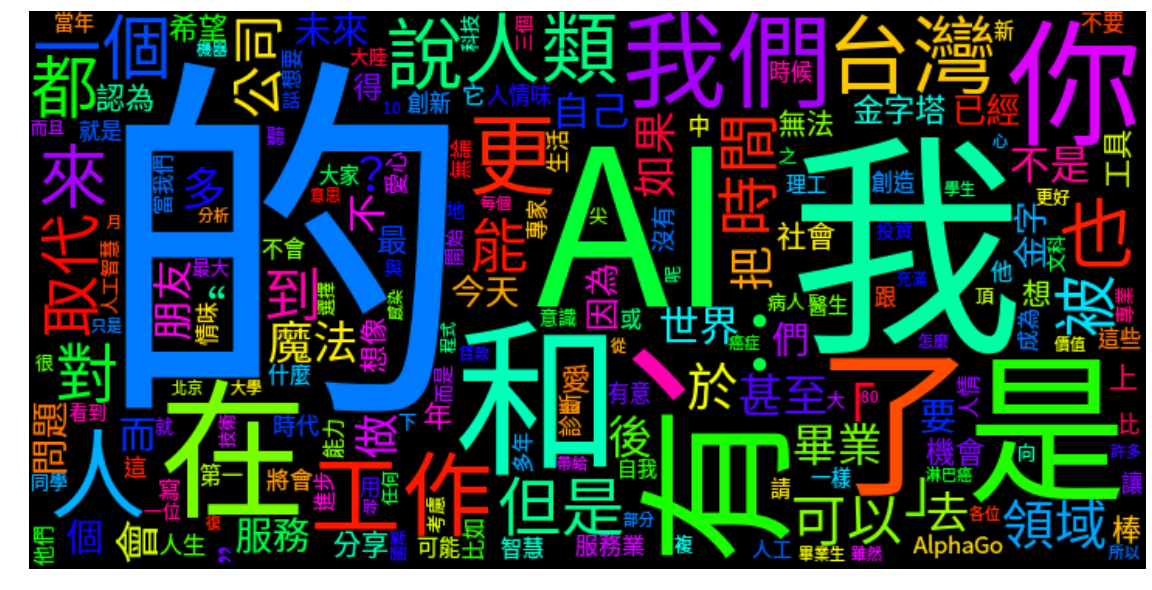

In [11]:
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
seglist = jieba.cut(speech, cut_all=False)
# seglist =jieba.cut_for_search(speech)
countW=Counter(seglist)#傳回list中的次數
# Generate a word cloud image
wordcloud = WordCloud(
    font_path='NotoSansCJKtc-Regular.otf',
    width=720,
    height=360,
    relative_scaling=.5
).generate_from_frequencies(countW)
# the matplotlib way:
get_ipython().magic(u'matplotlib inline')
plt.figure(figsize=(20, 30))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()